In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#导入模型
path = os.path.join('data','D:/Codes/training.csv')
data = pd.read_csv(path)

# 打乱数据集
from sklearn import utils
data = utils.shuffle(data)

y = data["Fire Alarm"].values
x = data.drop("Fire Alarm", axis=1).values

比较决策树划分标准对模型影响

In [3]:
DT = DecisionTreeClassifier(random_state = 66)
score = cross_val_score(DT,x,y,cv=10).mean()
print('基尼系数得分: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(DT,x,y,cv=10).mean()
print('熵得分: %.4f'%score)

基尼系数得分: 0.9998
熵得分: 0.9999


可以看到，使用熵比使用基尼系数得到的结果更好？?我不理解

最优参数以及最高得分: [7.         0.99985221]


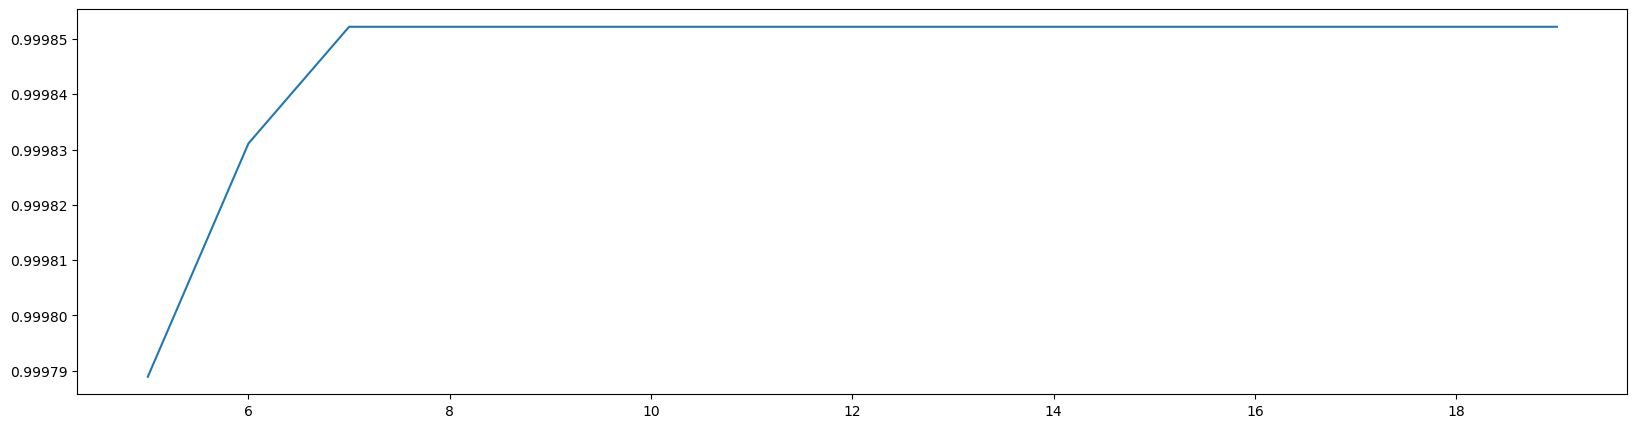

In [13]:
ScoreAll = []
for i in range(5,20,1):
    DT = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = 66)
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] #找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

可以看到，使用熵，当树的深度达到7的时候，再增加树的深度，模型正确率不再上升

最优参数以及最高得分: [8.         0.99976778]


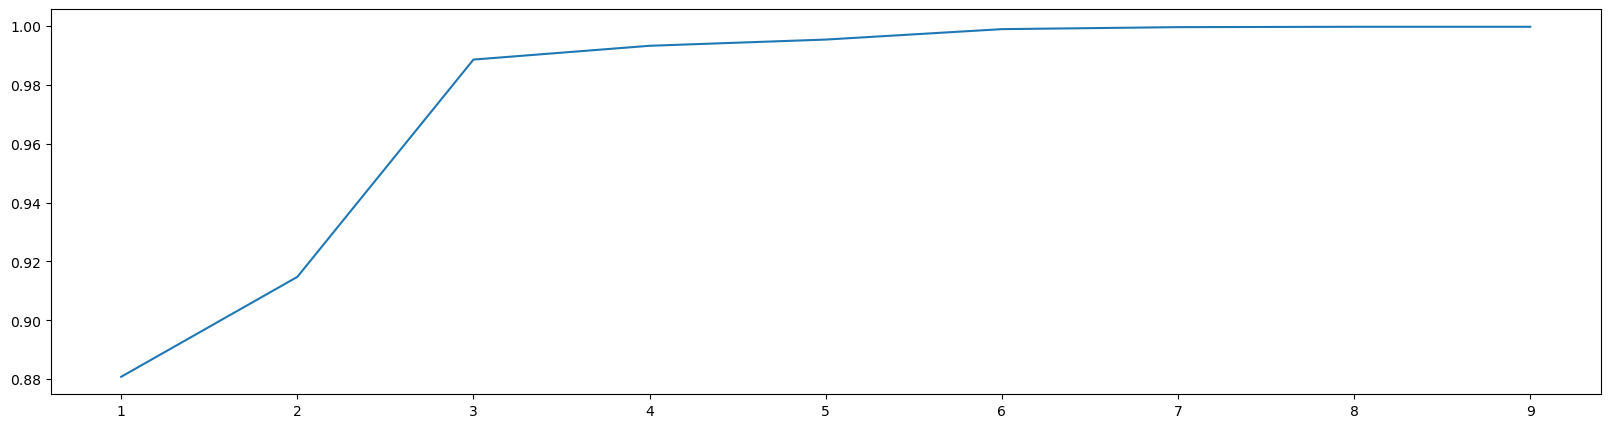

In [15]:
ScoreAll = []
for i in range(1,10):
    DT = DecisionTreeClassifier(max_depth = i,random_state = 66)
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] #找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

可以看到，使用基尼系数，当树的深度达到8的时候，再增加树的深度，模型正确率不再上升

利用暂定的max_depth参数8，使用基尼系数：
观察得分随着min_samples_split（分割内部节点所需的最小样本数）的变化规律，从而确定min_samples_split参数的大概范围

最优参数以及最高得分: [2.         0.99976778]


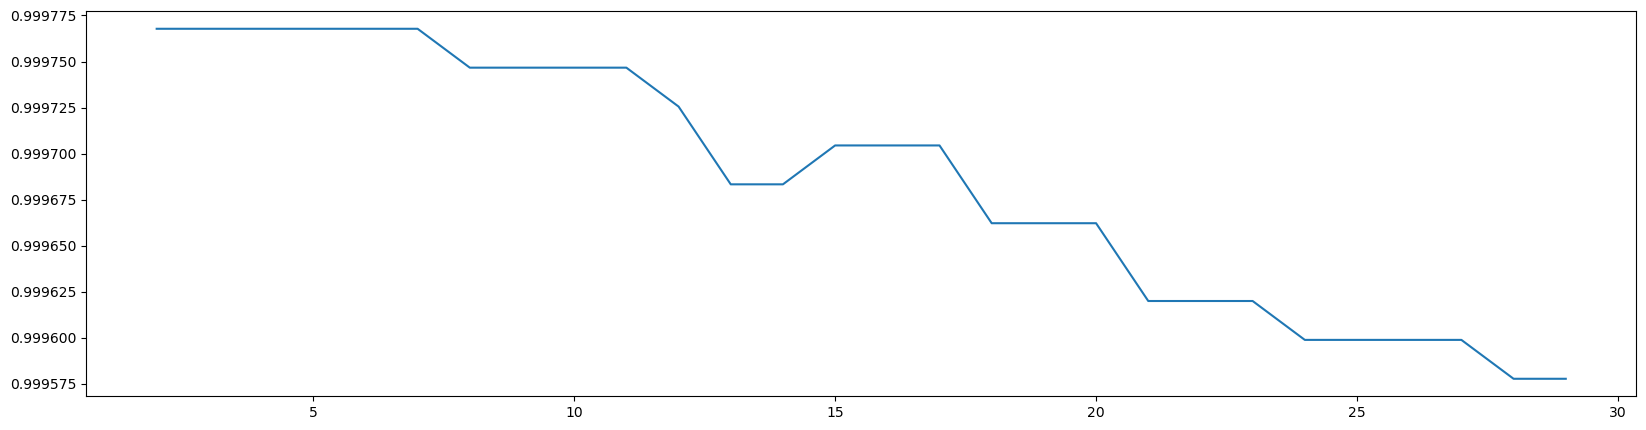

In [17]:
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = 8,min_samples_split = i,random_state = 66)
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] #找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

可以看到，随着min_samples_split的增大，模型得分一直下降，这就说明模型稍微有一些过拟合。所以我们下一步调参时min_samples_split直接从2~10这个范围取数就可以。

最优参数以及最高得分: [1.         0.99976778]


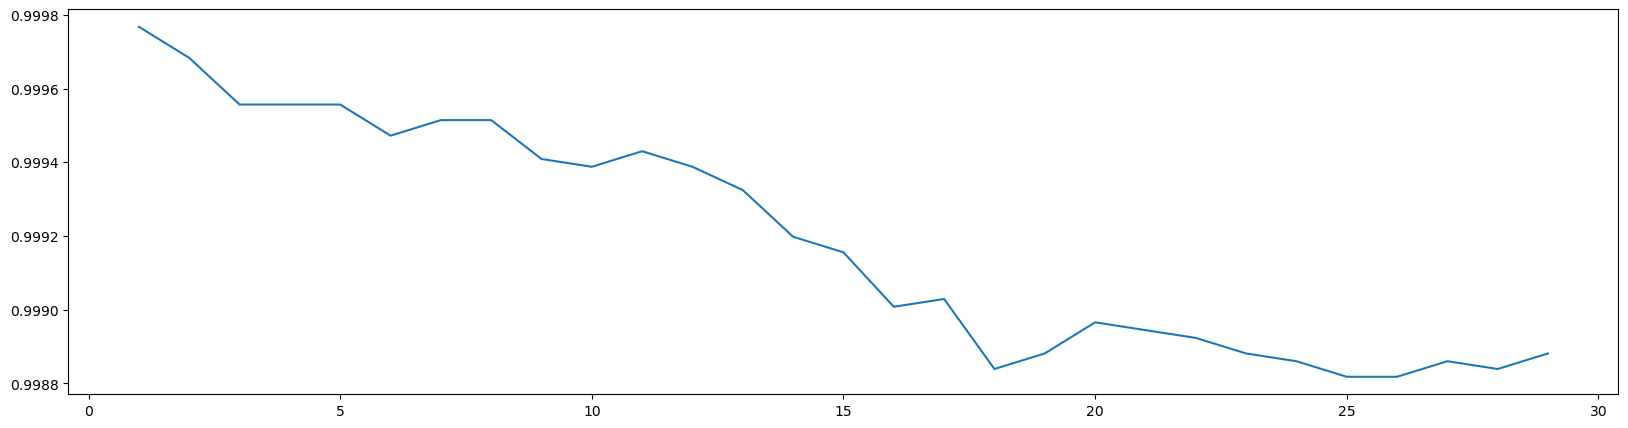

In [20]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(min_samples_leaf = i,min_samples_split = 2,max_depth = 8,random_state = 66)
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] #找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [25]:
#max_depth、min_samples_leaf和min_samples_split一块儿调整  
param_grid = {
    'max_depth':np.arange(5, 10),
    'min_samples_leaf':np.arange(2, 8),
    'min_samples_split':np.arange(2, 5)}

rfc = DecisionTreeClassifier(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9996833394311031


In [26]:
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
38261,26.830,48.28,1341,400,12982,19393,938.720,1.58,1.64,10.89,1.698,0.038,1
11554,24.680,52.74,1153,468,12853,19435,938.893,1.80,1.87,12.42,1.936,0.044,1
21855,24.990,51.60,1214,400,12951,19437,938.729,1.63,1.69,11.18,1.744,0.039,1
2500,23.900,51.92,904,693,12778,19489,939.084,2.56,2.66,17.65,2.752,0.062,1
39106,24.960,51.50,1230,415,12924,19421,938.756,1.74,1.81,11.96,1.865,0.042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18342,17.574,42.42,181,415,12772,20538,937.386,1.73,1.80,11.92,1.859,0.042,0
8883,24.900,51.65,1105,509,12846,19458,938.871,1.78,1.85,12.26,1.912,0.043,1
5947,20.727,47.56,1157,400,12917,19436,938.692,1.46,1.52,10.05,1.567,0.035,1
24579,24.380,54.01,1389,408,12959,19381,938.705,1.71,1.78,11.76,1.834,0.041,1
